In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import os
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt

In [2]:
path = 'DATA/'

train = []
test = []

# Walk through player files
for dir_path , dir_name , file_names in os.walk(path) :
    # 2017 will be our testing set
    if '2017' in dir_path :
        for name in file_names :
            # Grab avgs file
            if name[-4:] == 'avgs' :
                data = pd.read_csv(os.path.join(dir_path,name))
                if isinstance(test,list) :
                    test = data.drop(['Unnamed: 0'],axis=1).as_matrix()
                else :
                    test = np.vstack((test,data.drop(['Unnamed: 0'],axis=1)))
    # Everything else will become our training set
    else :
        for name in file_names :
            # Grab avgs file
            if name[-4:] == 'avgs' :
                data = pd.read_csv(os.path.join(dir_path,name))
                if isinstance(train,list) :
                    train = data.drop(['Unnamed: 0'],axis=1).as_matrix()
                else :
                    train = np.vstack((train,data.drop(['Unnamed: 0'],axis=1).as_matrix()))

# From the way the data is saved, the last column is whether or not the player
#     is considered a major contributor during the season.
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

In [3]:
lasso = Lasso(alpha=.3)
lasso.fit(train_x,train_y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [4]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [5]:
columns = ['MP','ORtg','%Ps','Pts','OR','DR','A','TO','Blk','Stl','PF','2Pt %','3Pt %','FT %','2Pt %Att','3Pt %Att','FT %Att','Pnts-Prev','Marg']
pretty_print_linear(lasso.coef_, columns)

'0.0 * MP + 0.007 * ORtg + 0.011 * %Ps + 0.0 * Pts + 0.0 * OR + 0.0 * DR + 0.0 * A + 0.0 * TO + 0.0 * Blk + 0.0 * Stl + 0.0 * PF + 0.0 * 2Pt % + 0.0 * 3Pt % + 0.0 * FT % + 0.0 * 2Pt %Att + 0.0 * 3Pt %Att + 0.0 * FT %Att + -0.0 * Pnts-Prev + -0.0 * Marg'

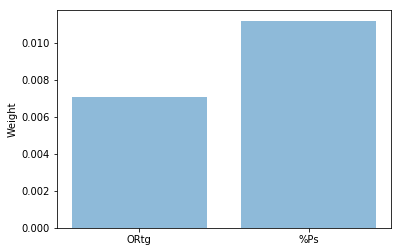

In [9]:
x = np.arange(2)
y = lasso.coef_[1:3]
plt.bar(x,y,align='center',alpha=0.5)
plt.xticks(x,columns[1:3])
plt.ylabel('Weight')
plt.savefig("Feature_Weights.pdf",bbox_inches="tight")
plt.show()